In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import sklearn.linear_model as lm
import sklearn.ensemble as ens
import sklearn.neural_network as nn

In [35]:
def natural_sort(l):
    def convert(text): return int(text) if text.isdigit() else text.lower()

    def alphanum_key(key): return [convert(c)
                                   for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [40]:
dataset_path = "mtist_datasets"
es_score_path = "mtist_datasets/output_geom/inference_result_infer_from_did_geom_mean"
n_dset = len([i for i in os.listdir(es_score_path) if i.split("_")[0]=="inferred"])

dataset_files = [i for i in os.listdir(dataset_path) if i.split("_")[0]=="dataset" and int(re.findall("_([0-9]+).csv", i)[0]) < n_dset]
dataset_files = natural_sort(dataset_files)

In [65]:
es_scores = pd.read_csv(f"{es_score_path}/es_scores.csv", index_col=0)

In [58]:
dset_param_cols = ["n_species", "n_timeseries", "n_timepoints", "noise"]
dset_param_vals = []

for dset in dataset_files:
    dset_param_vals.append(np.unique(pd.read_csv(f"{dataset_path}/{dset}", index_col=0)[["n_species", "n_timeseries", "n_timepoints", "noise"]], axis=0))

In [63]:
np.concatenate(dset_param_vals)

array([[1.0e+02, 5.0e+00, 5.0e+00, 1.0e-02],
       [1.0e+02, 5.0e+00, 1.0e+01, 1.0e-02],
       [1.0e+02, 5.0e+00, 1.5e+01, 1.0e-02],
       ...,
       [3.0e+00, 5.0e+01, 5.0e+00, 1.0e-01],
       [3.0e+00, 5.0e+01, 1.0e+01, 1.0e-01],
       [3.0e+00, 5.0e+01, 1.5e+01, 1.0e-01]])

In [68]:
df = pd.DataFrame(np.concatenate(dset_param_vals), columns=dset_param_cols)
df[["es_score_raw", "es_score_floored"]] = es_scores

df

,n_species,n_timeseries,n_timepoints,noise,es_score_raw,es_score_floored
0,100.0,5.0,5.0,0.01,0.514210,0.501445
1,100.0,5.0,10.0,0.01,0.512042,0.516137
2,100.0,5.0,15.0,0.01,0.500963,0.501927
3,100.0,5.0,5.0,0.01,0.508430,0.500000
4,100.0,5.0,10.0,0.01,0.511561,0.510597
...,...,...,...,...,...,...
1129,3.0,50.0,10.0,0.10,0.888889,0.833333
1130,3.0,50.0,15.0,0.10,1.000000,1.000000
1131,3.0,50.0,5.0,0.10,1.000000,1.000000
1132,3.0,50.0,10.0,0.10,1.000000,1.000000


In [73]:
df["es_score_raw"].values

array([0.51421002, 0.51204239, 0.50096339, ..., 1.        , 1.        ,
       1.        ])

In [83]:
df["n_species"].unique()

array([100.,  10.,   3.])

In [112]:
n_sp = 3.
df_n_sp = df[df.n_species==n_sp]
feat = df_n_sp.iloc[:,1:4].values
label = df_n_sp["es_score_raw"].values

lr = lm.LinearRegression()
lr.fit(feat, label)


LinearRegression()

In [113]:
lr.intercept_, lr.coef_

(0.7835645260188955, array([ 0.00128495,  0.01384602, -0.60800783]))

In [114]:
feat.shape

(486, 3)

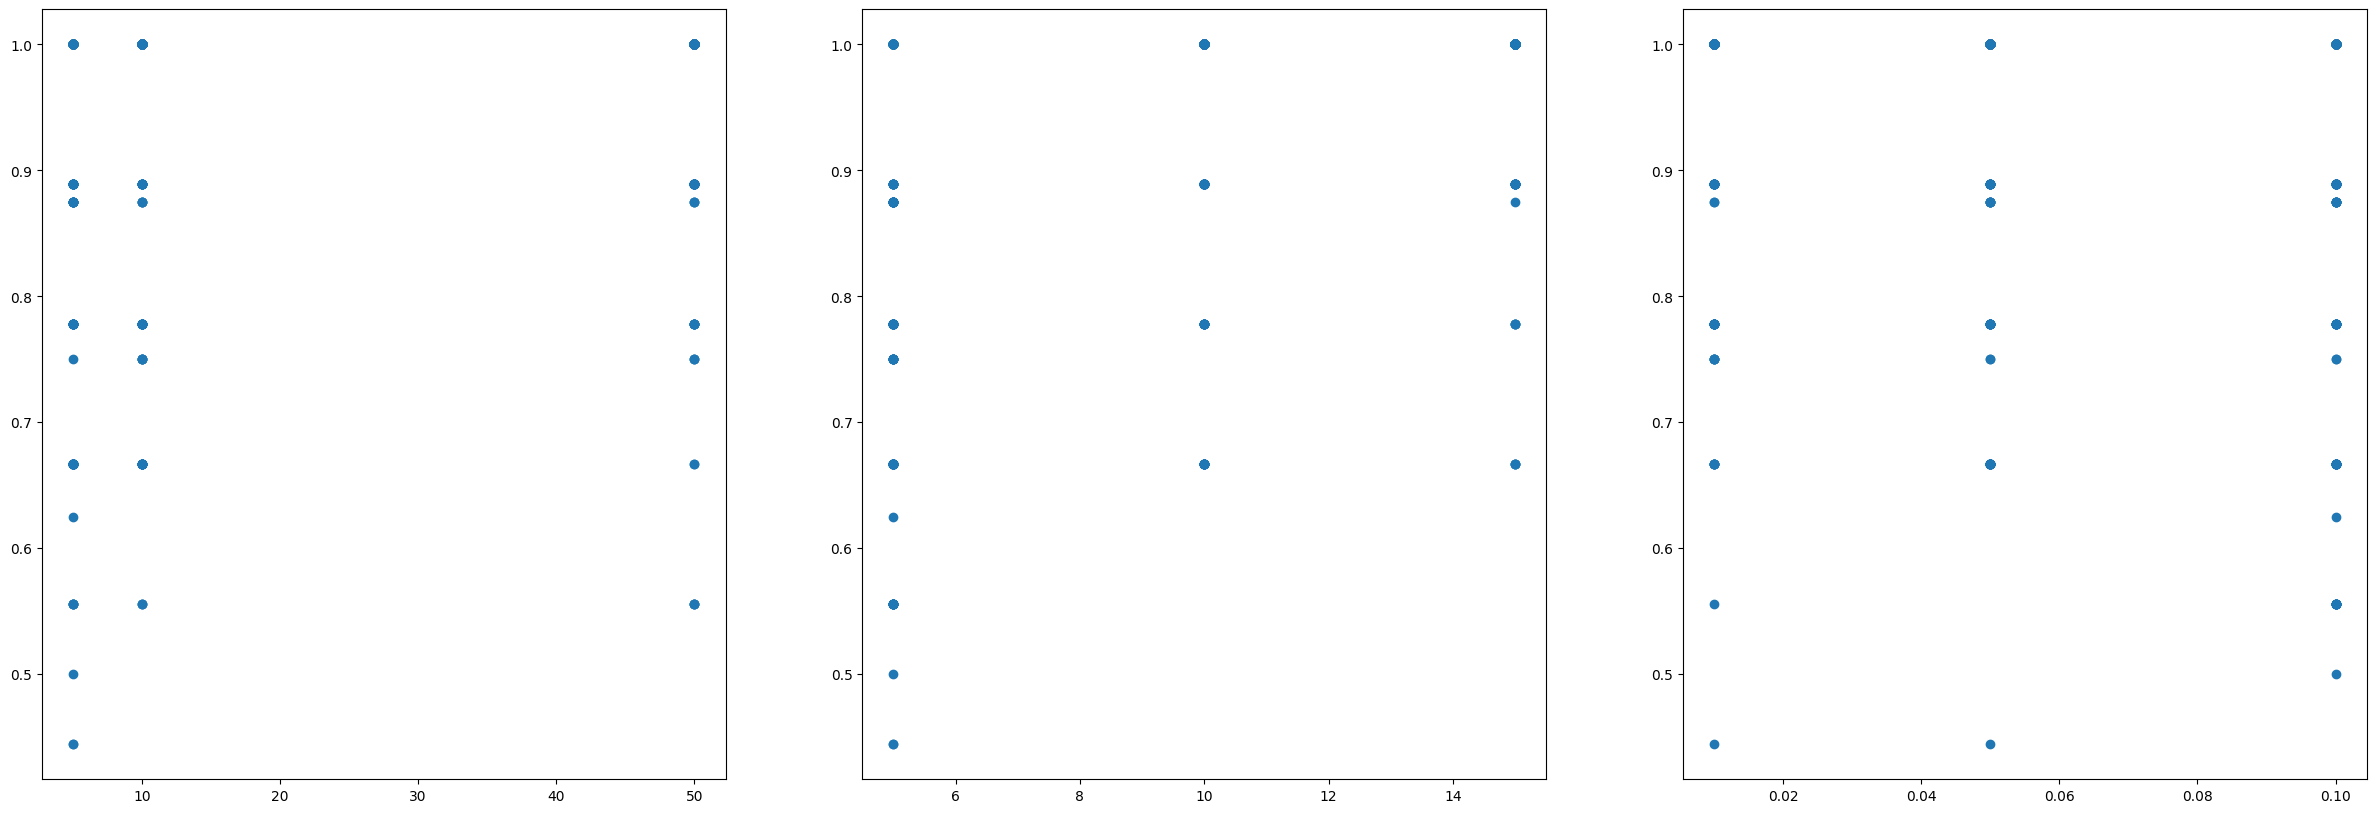

In [115]:
plt.subplots(1, feat.shape[1], figsize=(10*feat.shape[1], 10))
for i in range(feat.shape[1]):
    plt.subplot(1, feat.shape[1], i+1)
    plt.scatter(feat[:,i], label)
    
plt.show()

In [116]:
lr.score(feat, label)

0.2572441546076012

In [117]:
rfr = ens.RandomForestRegressor()

rfr.fit(feat, label)

RandomForestRegressor()

In [118]:
rfr.score(feat, label)

0.3172139035547571

In [125]:
nnet = nn.MLPRegressor(activation="logistic")
nnet.fit(feat, label)
nnet.score(feat, label)

0.23168736943414592